In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visulization
import seaborn as sns #Data Visulization


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Loading data

In [5]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
data.isnull().sum() #checking for nan values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# EDA

Text(0.5, 0.98, 'Distribution of Numerical Variable')

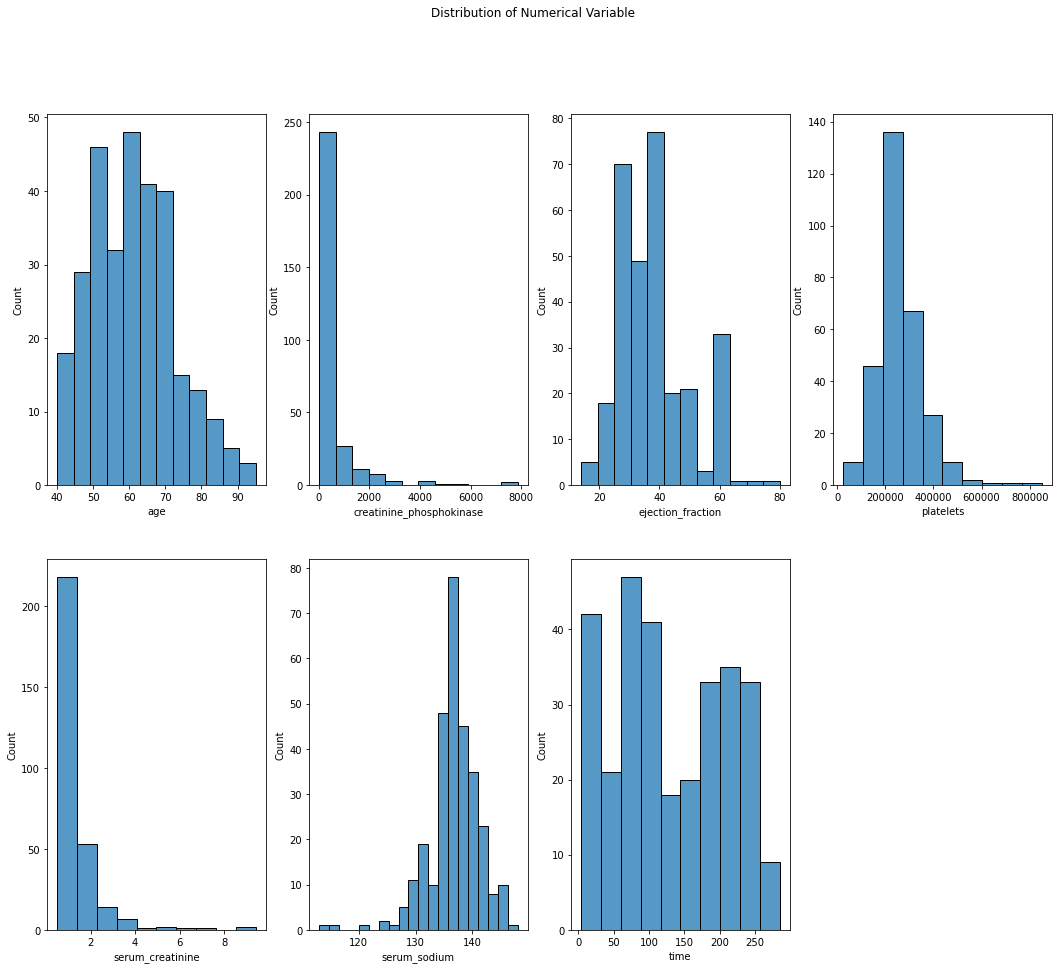

In [9]:
fig,ax=plt.subplots(2,4,figsize=(18,15),)      #visualization of non-continous data
sns.histplot( x=data.age , ax=ax[0,0] , bins=12)
sns.histplot( x=data.creatinine_phosphokinase , ax=ax[0,1] , bins=12)
sns.histplot( x=data.ejection_fraction , ax=ax[0,2] , bins=12)
#sns.histplot(x=data.ejection_fraction,ax=ax[0,2])
sns.histplot( x=data.platelets,bins=10, ax=ax[0,3])
sns.histplot( x=data.serum_creatinine, ax=ax[1,0],bins=10)
sns.histplot( x=data.serum_sodium, ax=ax[1,1])
sns.histplot( x=data.time, ax=ax[1,2])
ax[1,3].axis('off') 
plt.suptitle("Distribution of Numerical Variable")

Text(0.5, 0.98, 'Distribution Of Categorical Variable')

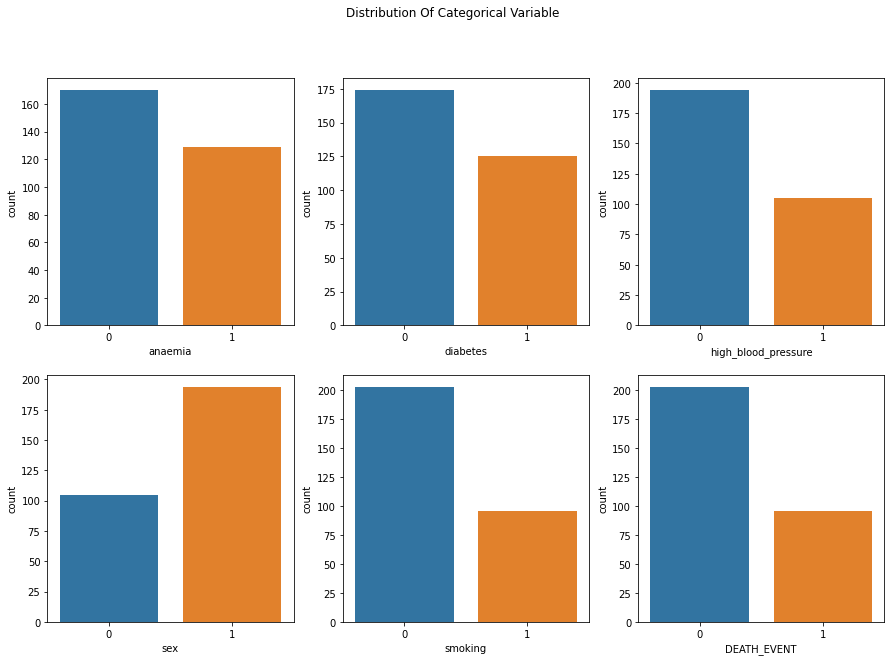

In [10]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
sns.countplot(x=data.anaemia,ax=ax[0,0])
sns.countplot(x=data.diabetes,ax=ax[0,1])
sns.countplot(x=data.high_blood_pressure,ax=ax[0,2])
sns.countplot(x=data.sex,ax=ax[1,0])
sns.countplot(x=data.smoking,ax=ax[1,1])
sns.countplot(x=data.DEATH_EVENT,ax=ax[1,2])
plt.suptitle("Distribution Of Categorical Variable")

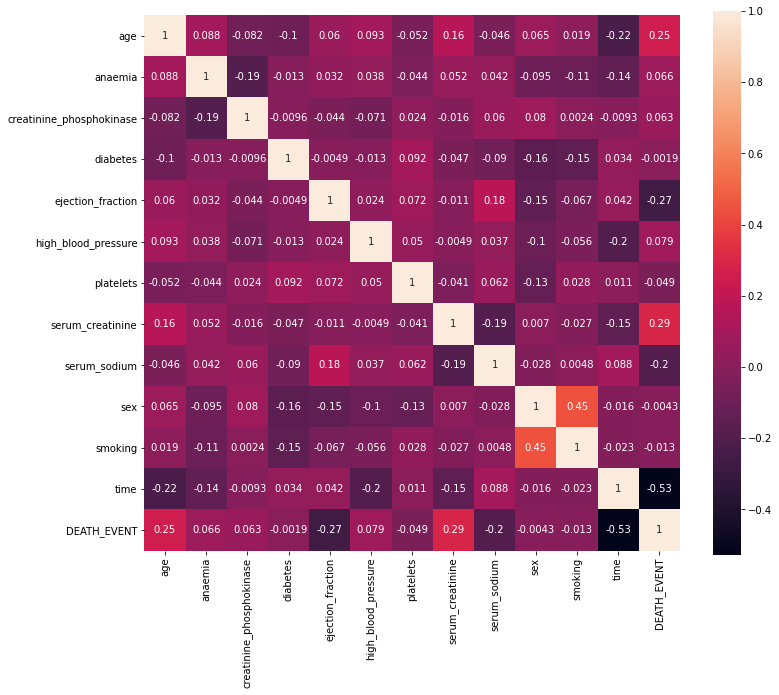

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,square=True)
plt.show()

In [12]:
# As the heat map shows that 'time' attribute has a negative relation with 'Death_event' attribute so it is better to drop time 

In [13]:
data=data.drop('time',axis=1)

In [14]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


([<matplotlib.patches.Wedge at 0x25363318a60>,
 [Text(0.8812939725856149, 0.8144451693541226, 'Female Survived'),
  Text(-0.3298221023836515, 1.1537839402501788, 'Female Died'),
  Text(-1.0795947134955046, -0.5239038600664818, 'Male Survived'),
  Text(0.9542582713968122, -0.7275927098801692, 'Male_Died')],
 [Text(0.514088150674942, 0.4750930154565715, '23.75%'),
  Text(-0.19239622639046336, 0.6730406318126043, '11.37%'),
  Text(-0.6297635828723775, -0.305610585038781, '44.15%'),
  Text(0.5566506583148071, -0.42442908076343205, '20.74%')])

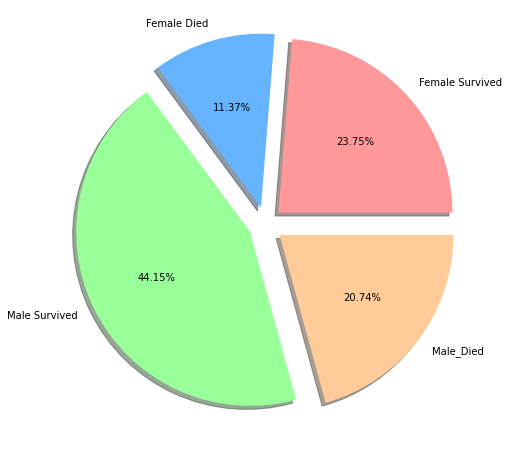

In [15]:
female_survived=data.age[(data.sex==0) & (data.DEATH_EVENT==0)].count()
female_died=data.age[(data.sex==0) &(data.DEATH_EVENT==1)].count()
male_survived=data.age[(data.sex==1) & (data.DEATH_EVENT==0)].count()
male_died=data.age[(data.sex==1) & (data.DEATH_EVENT==1)].count()

df=[female_survived,female_died,male_survived,male_died]
labels=['Female Survived','Female Died','Male Survived','Male_Died']
colors=['#ff9999','#66b3ff','#99ff99','#ffcc99']
explde=[0.1,0.1,0.1,0.1]
plt.figure(figsize=(8,8))
plt.pie(x=df , labels=labels , autopct="%1.2f%%" , shadow=True , explode=explde , colors=colors)

In [16]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [17]:
data1=data.copy()
data1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [18]:
x=data1.iloc[:,0:11].values
y=data1.iloc[:,11].values

In [19]:
scale=StandardScaler()
x[:,[0,2,4,6,7,8]] = scale.fit_transform(x[:,[0,2,4,6,7,8]])

# Splitting data into train-test

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

# Modeling

# Logistic Regression

In [21]:
reg=LogisticRegression()
reg.fit(xtrain,ytrain)               #training on data
predicted=reg.predict(xtest)         #testing data on trained model

Accuracy =  72.0 %


Text(0.5, 1.0, 'CONFUSION MATRIX')

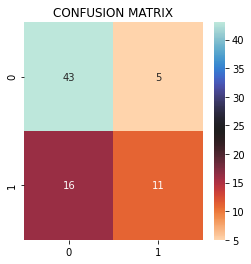

In [22]:
conf_mat=confusion_matrix(ytest,predicted)
Acc_LR=accuracy_score(ytest,predicted)

print("Accuracy = ",(Acc_LR)*100,"%")
plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat , annot=True, cmap='icefire_r')
plt.title('CONFUSION MATRIX')

In [23]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(reg, x, y, cv=5, scoring='accuracy') # k = 5
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.71666667 0.73333333 0.68333333 0.8        0.77966102]
Standard Deviation: 0.042282917679810565
Accuracy: 0.743 (0.042)


In [24]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(reg, x, y, cv=10, scoring='accuracy') # k = 10
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.73333333 0.66666667 0.73333333 0.66666667 0.83333333 0.6
 0.76666667 0.8        0.83333333 0.75862069]
Standard Deviation: 0.07246932736434437
Accuracy: 0.739 (0.072)


In [25]:
from sklearn.model_selection import  RepeatedKFold
cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 1)
score = cross_val_score(reg, x, y, cv=cv, scoring='accuracy')
# print(score)
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.83333333 0.76666667 0.66666667 0.7        0.63333333 0.8
 0.73333333 0.8        0.83333333 0.72413793 0.83333333 0.7
 0.76666667 0.73333333 0.73333333 0.7        0.83333333 0.7
 0.8        0.68965517 0.8        0.73333333 0.5        0.83333333
 0.8        0.8        0.7        0.63333333 0.76666667 0.86206897
 0.73333333 0.7        0.83333333 0.7        0.7        0.66666667
 0.6        0.76666667 0.93333333 0.72413793 0.83333333 0.8
 0.66666667 0.66666667 0.86666667 0.73333333 0.83333333 0.63333333
 0.73333333 0.68965517]
Standard Deviation: 0.07957259324324645
Accuracy: 0.744 (0.080)


In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
cv2=StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
score = cross_val_score(reg, x, y, cv=cv2, scoring='accuracy')
# print(score)
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))
bestLR=np.mean(score)

Accuracy: [0.78666667 0.70666667 0.81333333 0.72       0.78666667]
Standard Deviation: 0.04165466493816882
Accuracy: 0.763 (0.042)


# Naive Bayes

In [27]:
nb=GaussianNB()
nb.fit(xtrain , ytrain)               #training on data
predicted=nb.predict(xtest)         #testing data on trained model

Accuracy =  65.33333333333333 %


Text(0.5, 1.0, 'CONFUSION MATRIX')

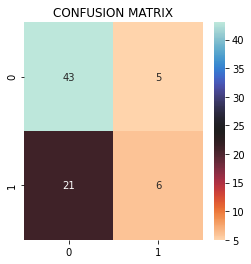

In [28]:
conf_mat=confusion_matrix(ytest,predicted)
Acc_NB=accuracy_score(ytest,predicted)

print("Accuracy = ",(Acc_NB)*100,"%")
plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat , annot=True, cmap='icefire_r')
plt.title('CONFUSION MATRIX')

In [29]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(nb, x, y, cv=5, scoring='accuracy') # k = 5
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.71666667 0.66666667 0.71666667 0.71666667 0.66101695]
Standard Deviation: 0.02594038741899967
Accuracy: 0.696 (0.026)


In [30]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(nb, x, y, cv=10, scoring='accuracy') # k = 10
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.8        0.7        0.63333333 0.63333333 0.73333333 0.66666667
 0.66666667 0.76666667 0.76666667 0.5862069 ]
Standard Deviation: 0.06621018909437433
Accuracy: 0.695 (0.066)


In [31]:
from sklearn.model_selection import  RepeatedKFold
cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 1)
score = cross_val_score(nb, x, y, cv=cv, scoring='accuracy')
# print(score)
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.73333333 0.8        0.66666667 0.76666667 0.5        0.7
 0.66666667 0.76666667 0.8        0.68965517 0.83333333 0.56666667
 0.73333333 0.63333333 0.7        0.7        0.83333333 0.63333333
 0.56666667 0.72413793 0.66666667 0.73333333 0.5        0.76666667
 0.73333333 0.66666667 0.8        0.66666667 0.63333333 0.75862069
 0.8        0.63333333 0.7        0.7        0.76666667 0.66666667
 0.63333333 0.7        0.86666667 0.65517241 0.76666667 0.73333333
 0.7        0.56666667 0.83333333 0.6        0.73333333 0.7
 0.73333333 0.65517241]
Standard Deviation: 0.08140533384805934
Accuracy: 0.702 (0.081)


In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
cv2=StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
score = cross_val_score(nb, x, y, cv=cv2, scoring='accuracy')
# print(score)
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))
bestNB=np.mean(score)

Accuracy: [0.74666667 0.66666667 0.74666667 0.66666667 0.73333333]
Standard Deviation: 0.03733333333333336
Accuracy: 0.712 (0.037)


# KNN 

In [33]:
knn=KNeighborsClassifier(n_neighbors = 15)
knn.fit(xtrain , ytrain)               #training on data
predicted=knn.predict(xtest)         #testing data on trained model

Accuracy =  69.33333333333334 %


Text(0.5, 1.0, 'CONFUSION MATRIX')

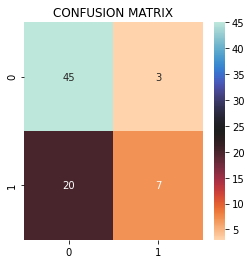

In [34]:
conf_mat=confusion_matrix(ytest,predicted)
Acc_KNN=accuracy_score(ytest,predicted)

print("Accuracy = ",(Acc_KNN)*100,"%")
plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat , annot=True, cmap='icefire_r')
plt.title('CONFUSION MATRIX')

In [35]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, x, y, cv=5, scoring='accuracy') # k = 5
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.81666667 0.7        0.66666667 0.71666667 0.72881356]
Standard Deviation: 0.05002326376349736
Accuracy: 0.726 (0.050)


In [36]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, x, y, cv=10, scoring='accuracy') # k = 10
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))
bestKNN=np.mean(score)

Accuracy: [0.86666667 0.76666667 0.73333333 0.73333333 0.7        0.63333333
 0.7        0.73333333 0.73333333 0.72413793]
Standard Deviation: 0.05584551100330721
Accuracy: 0.732 (0.056)


In [37]:
from sklearn.model_selection import  RepeatedKFold
cv = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 1)
score = cross_val_score(knn, x, y, cv=cv, scoring='accuracy')
# print(score)
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.76666667 0.83333333 0.7        0.76666667 0.63333333 0.76666667
 0.73333333 0.76666667 0.73333333 0.65517241 0.8        0.6
 0.8        0.7        0.7        0.76666667 0.86666667 0.7
 0.8        0.68965517 0.83333333 0.7        0.46666667 0.66666667
 0.63333333 0.73333333 0.83333333 0.73333333 0.66666667 0.82758621
 0.73333333 0.8        0.76666667 0.76666667 0.73333333 0.66666667
 0.56666667 0.76666667 0.83333333 0.65517241 0.8        0.76666667
 0.63333333 0.63333333 0.8        0.76666667 0.8        0.73333333
 0.76666667 0.65517241 0.76666667 0.76666667 0.73333333 0.8
 0.8        0.8        0.86666667 0.5        0.5        0.68965517
 0.8        0.63333333 0.8        0.63333333 0.83333333 0.7
 0.66666667 0.73333333 0.83333333 0.68965517 0.8        0.66666667
 0.7        0.8        0.8        0.53333333 0.86666667 0.66666667
 0.63333333 0.75862069 0.8        0.76666667 0.66666667 0.7
 0.73333333 0.73333333 0.8        0.63333333 0.73333333 0.62068966
 0.7        0.666666

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit
cv2=StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
score = cross_val_score(knn, x, y, cv=cv2, scoring='accuracy')
# print(score)
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.73333333 0.73333333 0.68       0.70666667 0.76      ]
Standard Deviation: 0.027194770739161496
Accuracy: 0.723 (0.027)


# Hyperparameter tuning for KNN

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=10)#5*50 times
knn_cv.fit(x, y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 11}
0.7325287356321839


# Decision Tree Entropy

In [40]:
dt=DecisionTreeClassifier(criterion = 'entropy',random_state=1)
dt.fit(xtrain , ytrain)               #training on data
predicted=dt.predict(xtest)         #testing data on trained model

Accuracy =  64.0 %


Text(0.5, 1.0, 'CONFUSION MATRIX')

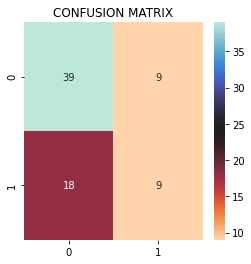

In [41]:
conf_mat=confusion_matrix(ytest,predicted)
Acc_DT=accuracy_score(ytest,predicted)

print("Accuracy = ",(Acc_DT)*100,"%")
plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat , annot=True, cmap='icefire_r')
plt.title('CONFUSION MATRIX')

In [42]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dt, x, y, cv=5, scoring='accuracy') # k = 5
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))


Accuracy: [0.63333333 0.73333333 0.66666667 0.7        0.6779661 ]
Standard Deviation: 0.03340239900343657
Accuracy: 0.682 (0.033)


In [43]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dt, x, y, cv=10, scoring='accuracy') # k = 10
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))
bestDTent=np.mean(score)

Accuracy: [0.7        0.56666667 0.66666667 0.6        0.7        0.66666667
 0.66666667 0.83333333 0.83333333 0.72413793]
Standard Deviation: 0.08189532162818883
Accuracy: 0.696 (0.082)


In [44]:
from sklearn.model_selection import  RepeatedKFold
cv = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 1)
score = cross_val_score(dt, x, y, cv=cv, scoring='accuracy')
# print(score)
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.7        0.76666667 0.6        0.66666667 0.66666667 0.7
 0.73333333 0.76666667 0.76666667 0.65517241 0.76666667 0.53333333
 0.76666667 0.6        0.7        0.76666667 0.73333333 0.76666667
 0.56666667 0.62068966 0.6        0.7        0.46666667 0.7
 0.73333333 0.7        0.76666667 0.63333333 0.6        0.68965517
 0.66666667 0.83333333 0.83333333 0.66666667 0.6        0.63333333
 0.6        0.6        0.76666667 0.44827586 0.83333333 0.8
 0.7        0.73333333 0.73333333 0.66666667 0.73333333 0.6
 0.6        0.5862069  0.8        0.7        0.66666667 0.76666667
 0.5        0.8        0.7        0.5        0.53333333 0.89655172
 0.63333333 0.76666667 0.6        0.63333333 0.73333333 0.63333333
 0.7        0.53333333 0.76666667 0.68965517 0.6        0.73333333
 0.7        0.63333333 0.76666667 0.56666667 0.73333333 0.7
 0.7        0.65517241 0.73333333 0.66666667 0.7        0.63333333
 0.66666667 0.6        0.76666667 0.56666667 0.6        0.82758621
 0.63333333 0.6     

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit
cv2=StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
score = cross_val_score(dt, x, y, cv=cv2, scoring='accuracy')
# print(score)
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.69333333 0.66666667 0.61333333 0.62666667 0.65333333]
Standard Deviation: 0.028472208672083506
Accuracy: 0.651 (0.028)


# GINI INDEX

In [46]:
dt_gini=DecisionTreeClassifier(criterion = 'gini',ccp_alpha=0.015,random_state=1)
dt_gini.fit(xtrain , ytrain)               #training on data
predicted=dt_gini.predict(xtest)         #testing data on trained model

Accuracy =  64.0 %


Text(0.5, 1.0, 'CONFUSION MATRIX')

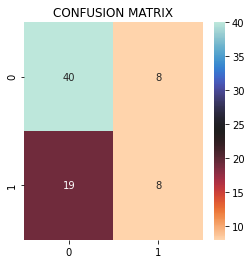

In [47]:
conf_mat=confusion_matrix(ytest,predicted)
Acc_DT_gini=accuracy_score(ytest,predicted)

print("Accuracy = ",(Acc_DT_gini)*100,"%")
plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat , annot=True, cmap='icefire_r')
plt.title('CONFUSION MATRIX')

In [48]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dt_gini, x, y, cv=5, scoring='accuracy') # k = 5
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))
bestDT=np.mean(score)

Accuracy: [0.75       0.75       0.75       0.81666667 0.83050847]
Standard Deviation: 0.0363151606992639
Accuracy: 0.779 (0.036)


In [49]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dt_gini, x, y, cv=10, scoring='accuracy') # k = 10
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.73333333 0.7        0.76666667 0.66666667 0.8        0.66666667
 0.73333333 0.8        0.8        0.79310345]
Standard Deviation: 0.05139872090851916
Accuracy: 0.746 (0.051)


In [50]:
from sklearn.model_selection import  RepeatedKFold
cv = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 1)
score = cross_val_score(dt_gini, x, y, cv=cv, scoring='accuracy')
# print(score)
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))


Accuracy: [0.76666667 0.9        0.7        0.63333333 0.7        0.8
 0.86666667 0.76666667 0.8        0.68965517 0.8        0.73333333
 0.86666667 0.7        0.83333333 0.73333333 0.63333333 0.66666667
 0.73333333 0.62068966 0.76666667 0.6        0.63333333 0.8
 0.86666667 0.9        0.76666667 0.66666667 0.76666667 0.86206897
 0.76666667 0.83333333 0.86666667 0.73333333 0.66666667 0.7
 0.63333333 0.7        0.9        0.5862069  0.76666667 0.86666667
 0.76666667 0.76666667 0.83333333 0.76666667 0.6        0.8
 0.66666667 0.72413793 0.8        0.76666667 0.66666667 0.7
 0.83333333 0.76666667 0.7        0.53333333 0.56666667 0.86206897
 0.76666667 0.76666667 0.73333333 0.66666667 0.76666667 0.6
 0.83333333 0.63333333 0.83333333 0.75862069 0.63333333 0.7
 0.8        0.6        0.73333333 0.73333333 0.76666667 0.8
 0.76666667 0.89655172 0.83333333 0.8        0.86666667 0.6
 0.66666667 0.76666667 0.8        0.63333333 0.63333333 0.72413793
 0.66666667 0.7        0.8        0.8        0.7

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit
cv2=StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
score = cross_val_score(dt_gini, x, y, cv=cv2, scoring='accuracy')
# print(score)
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.76       0.69333333 0.76       0.73333333 0.77333333]
Standard Deviation: 0.028472208672083492
Accuracy: 0.744 (0.028)


# SVM

In [52]:
from sklearn.svm import SVC

In [53]:
svm=SVC(kernel = 'linear', random_state = 0)
svm.fit(xtrain , ytrain)               #training on data
predicted=svm.predict(xtest)           #testing data on trained model

Accuracy =  72.0 %


Text(0.5, 1.0, 'CONFUSION MATRIX')

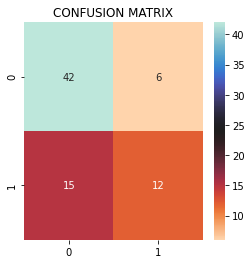

In [54]:
conf_mat=confusion_matrix(ytest,predicted)
Acc_SVM=accuracy_score(ytest,predicted)

print("Accuracy = ",(Acc_SVM)*100,"%")
plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat , annot=True, cmap='icefire_r')
plt.title('CONFUSION MATRIX')

In [55]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svm, x, y, cv=5, scoring='accuracy') # k = 5
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.71666667 0.68333333 0.73333333 0.8        0.76271186]
Standard Deviation: 0.0397811530568157
Accuracy: 0.739 (0.040)


In [56]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svm, x, y, cv=10, scoring='accuracy') # k = 10
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.76666667 0.66666667 0.7        0.66666667 0.8        0.63333333
 0.73333333 0.8        0.83333333 0.75862069]
Standard Deviation: 0.06369890528947333
Accuracy: 0.736 (0.064)


In [57]:
from sklearn.model_selection import  RepeatedKFold
cv = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 1)
score = cross_val_score(svm, x, y, cv=cv, scoring='accuracy')
# print(score)
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: [0.83333333 0.8        0.63333333 0.76666667 0.6        0.8
 0.66666667 0.8        0.76666667 0.68965517 0.83333333 0.66666667
 0.76666667 0.8        0.76666667 0.73333333 0.83333333 0.7
 0.76666667 0.72413793 0.76666667 0.76666667 0.5        0.8
 0.8        0.76666667 0.76666667 0.66666667 0.73333333 0.86206897
 0.73333333 0.73333333 0.83333333 0.66666667 0.76666667 0.66666667
 0.63333333 0.76666667 0.93333333 0.75862069 0.86666667 0.83333333
 0.66666667 0.6        0.83333333 0.73333333 0.83333333 0.6
 0.8        0.68965517 0.83333333 0.86666667 0.63333333 0.76666667
 0.7        0.83333333 0.7        0.63333333 0.53333333 0.75862069
 0.8        0.7        0.73333333 0.73333333 0.8        0.7
 0.66666667 0.76666667 0.8        0.72413793 0.66666667 0.7
 0.7        0.73333333 0.83333333 0.66666667 0.8        0.83333333
 0.7        0.82758621 0.76666667 0.73333333 0.8        0.7
 0.8        0.8        0.76666667 0.7        0.73333333 0.62068966
 0.7        0.56666667 0.83333333 

In [58]:
from sklearn.model_selection import StratifiedShuffleSplit
cv2=StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
score = cross_val_score(svm, x, y, cv=cv2, scoring='accuracy')
# print(score)
print('Accuracy:', score)
print('Standard Deviation:', np.std(score))
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))
bestSVM=np.mean(score)

Accuracy: [0.74666667 0.72       0.76       0.74666667 0.78666667]
Standard Deviation: 0.02166410241236255
Accuracy: 0.752 (0.022)


# Accuracy Visualization and Evaluation

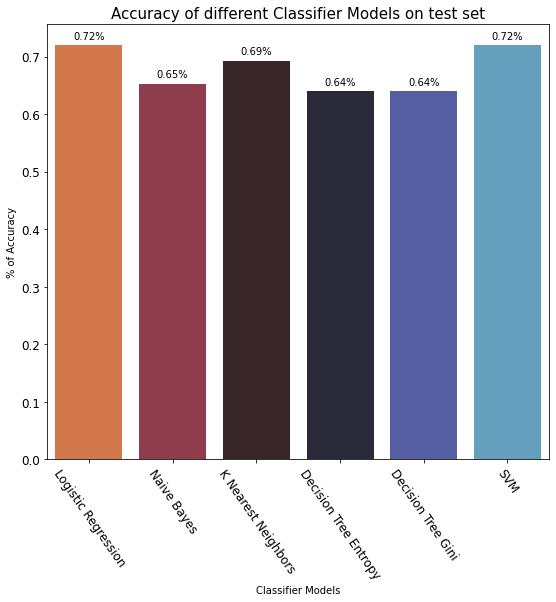

In [59]:
model_score=[Acc_LR,Acc_NB,Acc_KNN,Acc_DT,Acc_DT_gini,Acc_SVM]
model_name=["Logistic Regression","Naive Bayes","K Nearest Neighbors","Decision Tree Entropy","Decision Tree Gini","SVM"]

plt.subplots(figsize=(9,8))
splot=sns.barplot(x=model_name,y=model_score,palette = "icefire_r")
plt.xlabel('Classifier Models', fontsize = 10 )
plt.ylabel('% of Accuracy', fontsize = 10)
plt.title('Accuracy of different Classifier Models on test set', fontsize = 15)
plt.xticks(rotation=-55,fontsize = 12)
plt.yticks(fontsize = 12)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2 , p.get_height()),ha='center', xytext = (0, 6), textcoords = 'offset points',fontsize=10)

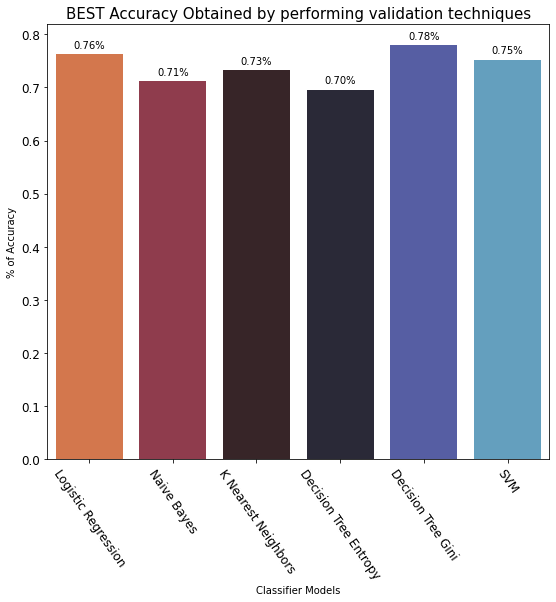

In [60]:
model_score=[bestLR,bestNB,bestKNN,bestDTent,bestDT,bestSVM]
model_name=["Logistic Regression","Naive Bayes","K Nearest Neighbors","Decision Tree Entropy","Decision Tree Gini","SVM"]

plt.subplots(figsize=(9,8))
splot=sns.barplot(x=model_name,y=model_score,palette = "icefire_r")
plt.xlabel('Classifier Models', fontsize = 10 )
plt.ylabel('% of Accuracy', fontsize = 10)
plt.title('BEST Accuracy Obtained by performing validation techniques', fontsize = 15)
plt.xticks(rotation=-55,fontsize = 12)
plt.yticks(fontsize = 12)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2 , p.get_height()),ha='center', xytext = (0, 6), textcoords = 'offset points',fontsize=10)